dataSize: 0
-1    6839
Name: count, dtype: int64
-1    6839
Name: count, dtype: int64


<Axes: >

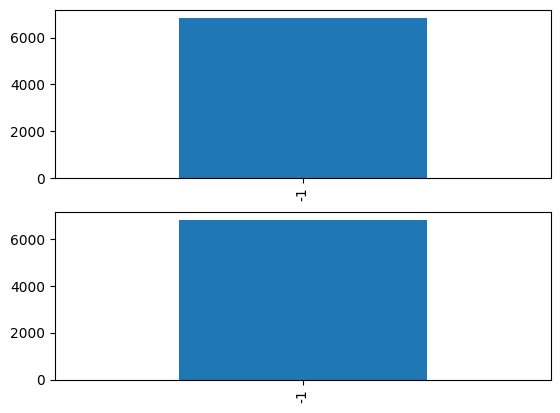

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from pylab import mpl

TARGET = 'price'

# 讀取CSV文件並轉換為DataFrame
df = pd.read_csv('maybePrice.csv')
df.dropna(inplace=True)
texts = df['Comment'].tolist()

count = 0

full_labels = []


simple_labels = []

deafult = np.zeros((1,len(df.iloc[0][3:].values)), dtype='O')[0]


for t in range(len(texts)):
    flag = False
    if(df.iloc[t][TARGET] == 1 or df.iloc[t][TARGET] == 2):
      simple_labels.append(1)
    elif(df.iloc[t][TARGET] == 4 or df.iloc[t][TARGET] == 5):
      simple_labels.append(3)
    elif(df.iloc[t][TARGET] == 3):
      simple_labels.append(2)
    else:
      if np.array_equal(df.iloc[t][3:].values, deafult) == False:
          simple_labels.append(0)
      else:
          simple_labels.append(-1)
          flag = True
    if flag:
       full_labels.append(-1)
    else:
      full_labels.append(df.iloc[t][TARGET])
      count += 1


fig, axes = plt.subplots(nrows=2, ncols=1)
print(f"dataSize: {count}")

print(pd.Series(simple_labels).value_counts())
pd.Series(simple_labels).value_counts().plot(kind='bar', ax=axes[0])

print(pd.Series(full_labels).value_counts())

pd.Series(full_labels).value_counts().plot(kind='bar', ax=axes[1])
